<a href="https://colab.research.google.com/github/Farah-Amalia/Lending-Club-Default-Prediction/blob/main/Lending_Club_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Default Prediction

#### Install kaggle dan konfigurasi permission

In [1]:
! pip install kaggle # Install kaggle
! mkdir ~/.kaggle # Make kaggle directory
! cp kaggle.json ~/.kaggle/ # Copy kaggle.json file
! chmod 600 ~/.kaggle/kaggle.json # Allocate permission

#### Download dataset dari kaggle

In [2]:
!kaggle datasets download -d jeandedieunyandwi/lending-club-dataset

 62% 17.0M/27.6M [00:00<00:00, 62.9MB/s]
100% 27.6M/27.6M [00:00<00:00, 79.2MB/s]


#### Import library yang dibutuhkan

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras import regularizers

#### Unzip dataset yang telah didownload

In [4]:
! unzip '/content/lending-club-dataset.zip'

Archive:  /content/lending-club-dataset.zip
  inflating: lending_club_loan_two.csv  


#### Membaca dataset

In [5]:
df = pd.read_csv("/content/lending_club_loan_two.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


#### Print informasi dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

#### Print statistika deskriptif dataset

In [7]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


#### Deskripsi dataset berupa data type, missing value, unique value, dan unique sample

In [8]:
data_describe=pd.DataFrame()

data_describe['Data Features'] = df.columns

dataType,null,unique,uniqueSample=[],[],[],[]
for i in df.columns:
    dataType.append(df[i].dtype)
    null.append(df[i].isna().sum())
    unique.append(len(df[i].unique()))
    uniqueSample.append(df[i].sample(2, replace=False).values)
    
data_describe['Data Type']=dataType
data_describe['Missing Values']=null
data_describe['Missing Values Percentage']=round(data_describe['Missing Values']/len(df)*100,2)
data_describe['Unique Values']=unique
data_describe['Unique Sample']=uniqueSample

data_describe

,Data Features,Data Type,Missing Values,Missing Values Percentage,Unique Values,Unique Sample
0,loan_amnt,float64,0,0.00,1397,"[16000.0, 8400.0]"
1,term,object,0,0.00,2,"[ 36 months, 60 months]"
2,int_rate,float64,0,0.00,566,"[10.15, 12.99]"
3,installment,float64,0,0.00,55706,"[461.54, 332.72]"
4,grade,object,0,0.00,7,"[B, C]"
5,sub_grade,object,0,0.00,35,"[B3, D1]"
6,emp_title,object,22927,5.79,173106,"[Vice President, Liberty Resources]"
7,emp_length,object,18301,4.62,12,"[1 year, nan]"
8,home_ownership,object,0,0.00,6,"[RENT, MORTGAGE]"
9,annual_inc,float64,0,0.00,27197,"[40000.0, 130000.0]"


### Exploratory Data Analysis

#### 1. Eksplorasi kolom target

Eksplorasi kolom target yaitu loan status

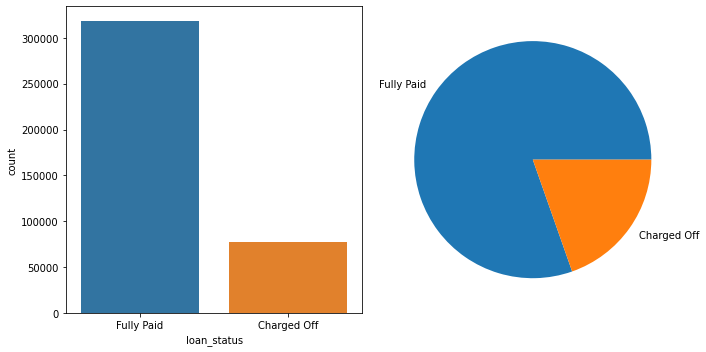

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='loan_status')

plt.subplot(1,2,2)
plt.pie(df['loan_status'].value_counts().values, labels=df['loan_status'].value_counts().index,)

plt.tight_layout()
plt.show()

#### 2. Eksplorasi kolom kategorik

Print kolom kategorikal

In [10]:
print('Categorical columns are:')
for i in df.select_dtypes(include=['object']).columns:
  print(i)

Categorical columns are:
term
grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
issue_d
loan_status
purpose
title
earliest_cr_line
initial_list_status
application_type
address


Function untuk membuat grafik berdasarkan kolom kategorik

In [11]:
def plot_cat_cols(col):

  counts = (df.groupby([col])['loan_status']
                      .value_counts()
                      .unstack(fill_value=0)
                      .stack()
                      .rename('count')
                      .reset_index()
                      .sort_values(col))
  charged_off = counts[counts['loan_status']=='Charged Off']['count']
  fully_paid = counts[counts['loan_status']=='Fully Paid']['count']
  
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(18,6))

  width = 0.75
  labels = counts[col].unique()
  
  ax1.bar(labels, charged_off, width, label='Charged Off')
  ax1.bar(labels, fully_paid, width, bottom=charged_off,
        label='Fully Paid')
  
  ax1.set_ylabel('Counts')
  ax1.set_title(f'Counts by loan status and {col}')
  ax1.tick_params('x', labelrotation=45) 
  ax1.legend()



  pct = (df.groupby([col])['loan_status']
                      .value_counts(normalize=True)
                      .unstack(fill_value=0)
                      .stack()
                      .rename('count')
                      .mul(100)
                      .reset_index()
                      .sort_values(col))
  charged_off = pct[pct['loan_status']=='Charged Off']['count']
  fully_paid = pct[pct['loan_status']=='Fully Paid']['count']

  width = 0.75
  labels = pct[col].unique()

  ax2.bar(labels, charged_off, width, label='Charged Off')
  ax2.bar(labels, fully_paid, width, bottom=charged_off,
        label='Fully Paid')

  ax2.set_ylabel('Percentage')
  ax2.set_title(f'Percentage by loan status and {col}')
  ax2.tick_params('x', labelrotation=45) 
  ax2.legend()

  plt.show()

###### Grafik untuk kolom term

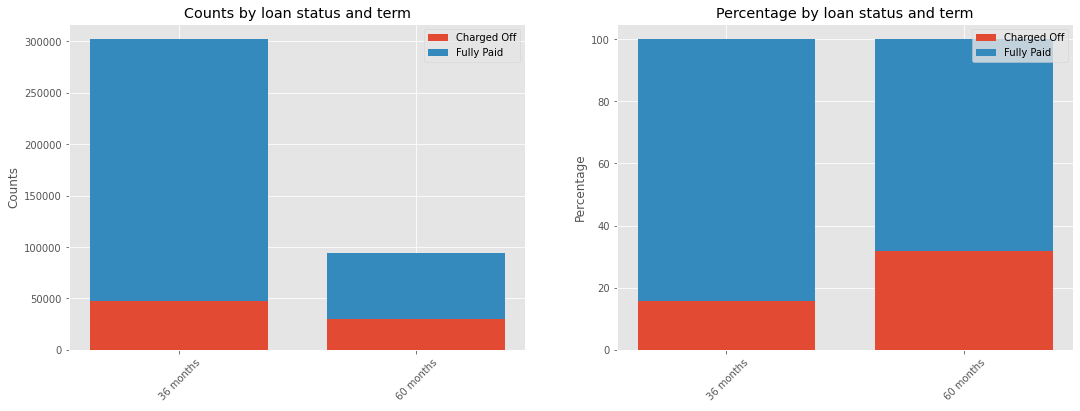

In [12]:
with plt.style.context('ggplot'):
    plot_cat_cols('term')

Kesimpulan dari grafik di atas adalah loan dengan tenor 60 bulan cenderung lebih banyak yang mengalami default.

###### Grafik untuk kolom grade

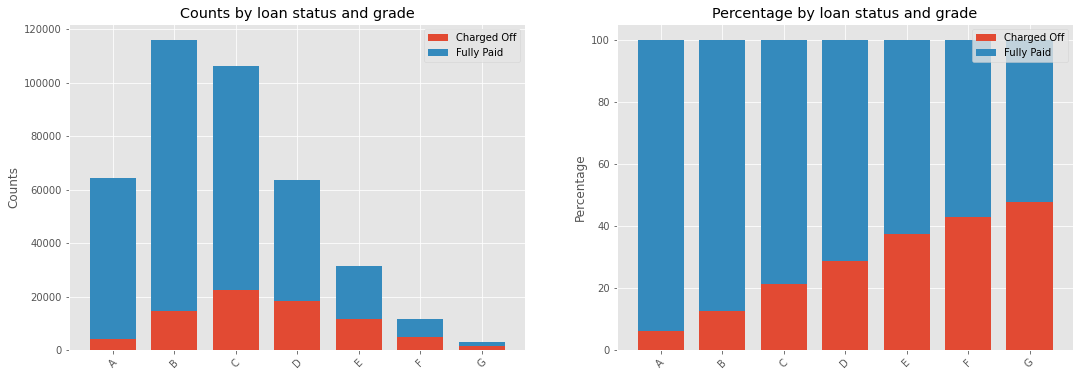

In [13]:
with plt.style.context('ggplot'):
    plot_cat_cols('grade')

Kesimpulan dari grafik di atas adalah loan dengan grade yang semakin rendah cenderung lebih banyak yang mengalami default. Loan paling banyak adalah dengan grade B.

###### Grafik untuk kolom sub grade

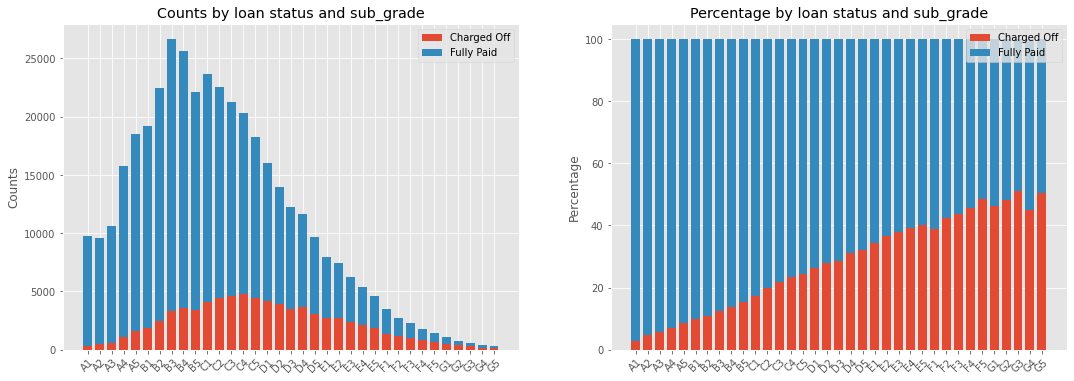

In [14]:
with plt.style.context('ggplot'):
    plot_cat_cols('sub_grade')

Kesimpulan dari grafik di atas adalah sama dengan kolom grade, di mana grade lebih rendah cenderung lebih banyak yang mengalami default.

###### Grafik untuk kolom employment length

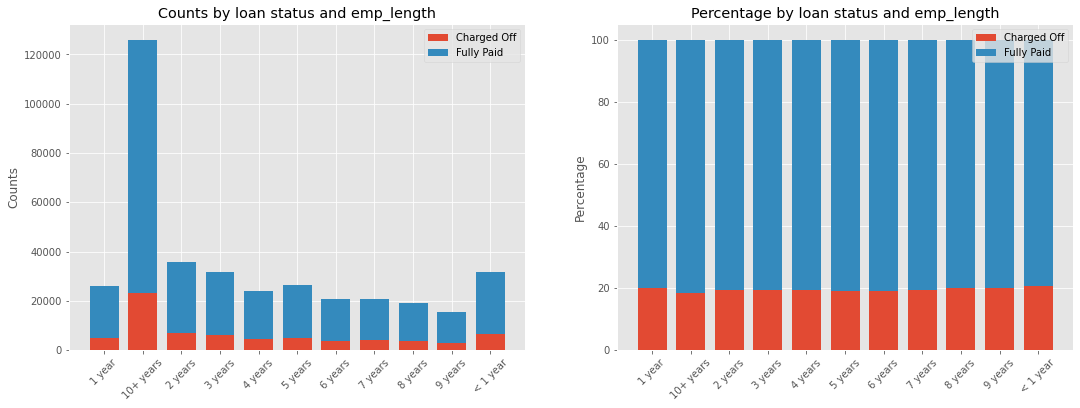

In [15]:
with plt.style.context('ggplot'):
    plot_cat_cols('emp_length')

Kesimpulan dari grafik di atas adalah employment length berapapun cenderung memiliki persentase default yang sama yaitu 20%.

###### Grafik untuk home ownership

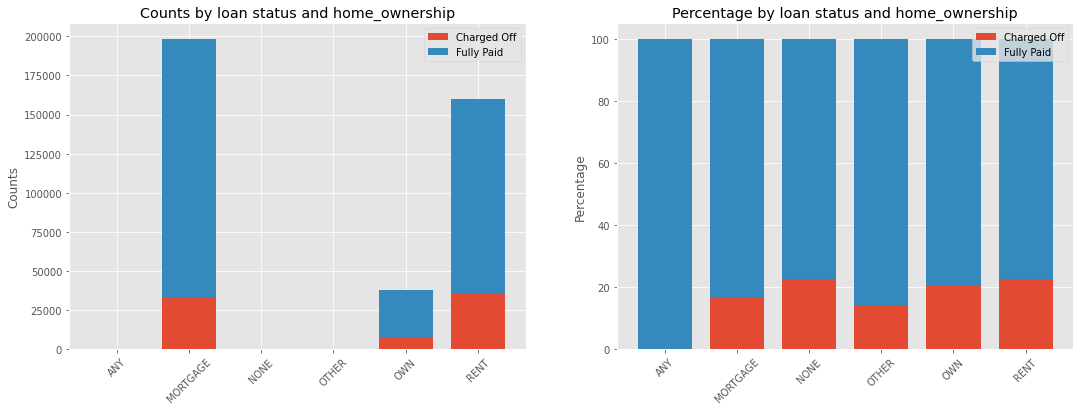

In [16]:
with plt.style.context('ggplot'):
    plot_cat_cols('home_ownership')

Kesimpulan dari grafik di atas adalah home ownership paling banyak adalah mortgage dan rent, sedangkan persentase default cenderung sama untuk semua home ownership.

###### Grafik untuk kolom verification status

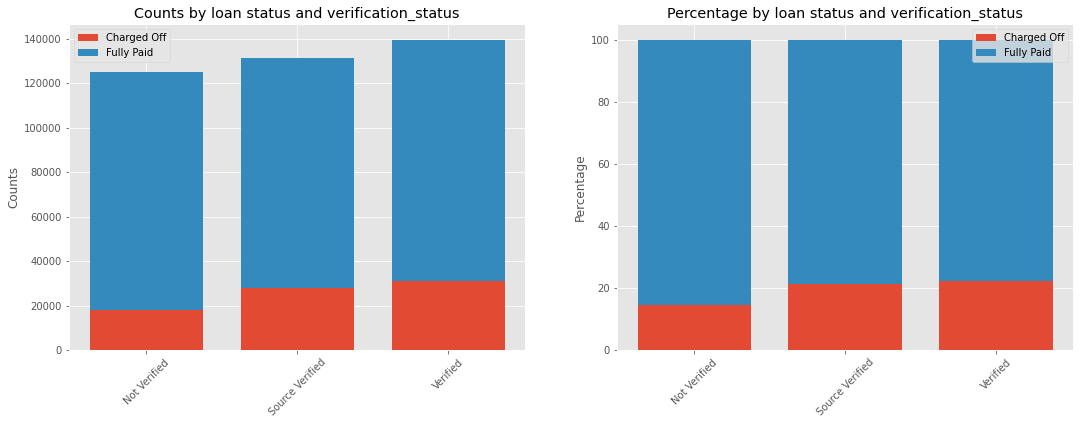

In [17]:
with plt.style.context('ggplot'):
    plot_cat_cols('verification_status')

Kesimpulan dari grafik di atas adalah loan verification status apapun cenderung memiliki persentase default yang sama.

###### Grafik untuk kolom purpose

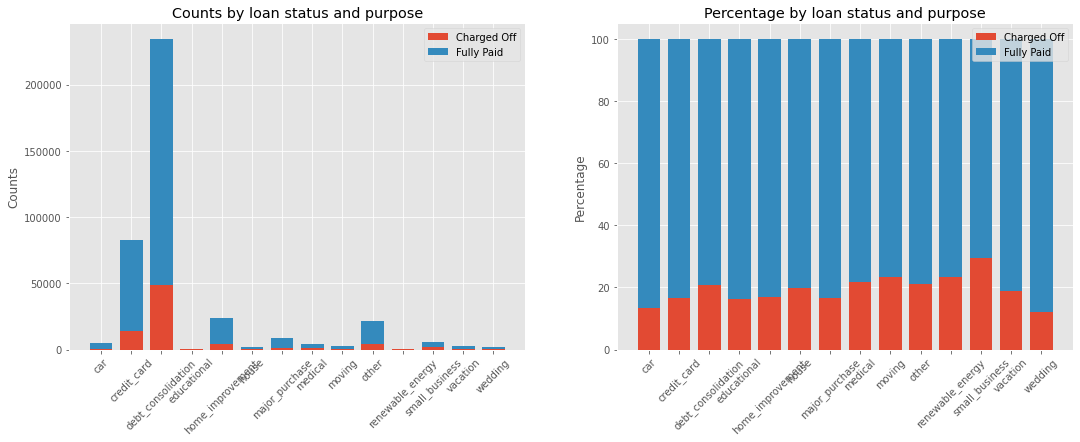

In [18]:
with plt.style.context('ggplot'):
    plot_cat_cols('purpose')

Kesimpulan dari grafik di atas adalah loan dengan tujuan debt consolidation adalah tipe yang paling banyak. Sedangkan loan dengan tujuan small business cenderung memiliki persentase default paling tinggi.

#### 3. Eksplorasi kolom numerik

Print kolom numerikal

In [19]:
print('Numerical columns are:')
for i in df.select_dtypes(include=['float64']).columns:
  print(i)

Numerical columns are:
loan_amnt
int_rate
installment
annual_inc
dti
open_acc
pub_rec
revol_bal
revol_util
total_acc
mort_acc
pub_rec_bankruptcies


Function untuk membuat grafik berdasarkan kolom numerik

In [20]:
def plot_num_cols(col):

  plt.figure(figsize=(15,5))

  plt.subplot(1,2,1)
  sns.distplot(df[df['loan_status']=='Charged Off'][col], label='Charged Off')
  sns.distplot(df[df['loan_status']=='Fully Paid'][col], label='Fully Paid')
  plt.legend()

  plt.subplot(1,2,2)
  sns.boxplot(data=df, x='loan_status', y=col)

  plt.show()

###### Grafik untuk kolom loan amount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


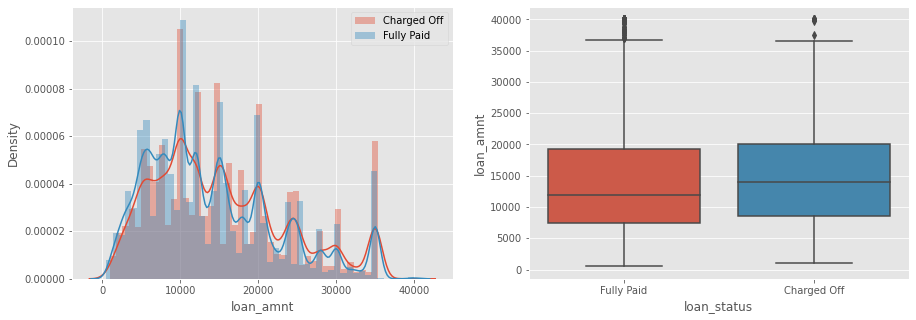

In [21]:
with plt.style.context('ggplot'):
    plot_num_cols('loan_amnt')

Kesimpulan dari grafik di atas adalah jumlah loan tidak jauh beda pada loan yang berhasil dibayar dan default.

###### Grafik untuk kolom installment

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


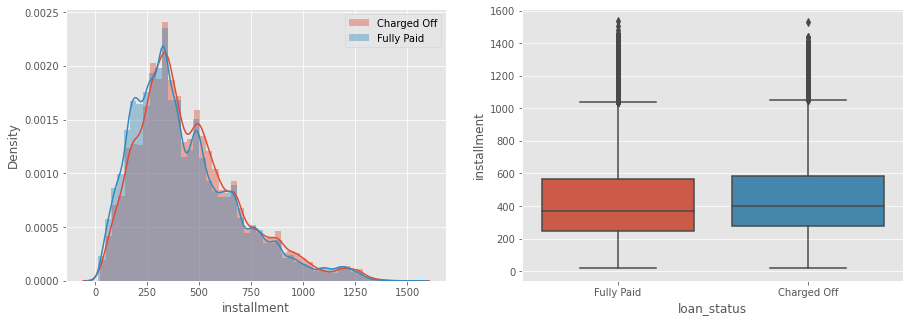

In [22]:
with plt.style.context('ggplot'):
    plot_num_cols('installment')

Kesimpulan dari grafik di atas adalah jumlah installment tidak jauh beda pada loan yang berhasil dibayar dan default.

###### Grafik untuk kolom interest rate

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


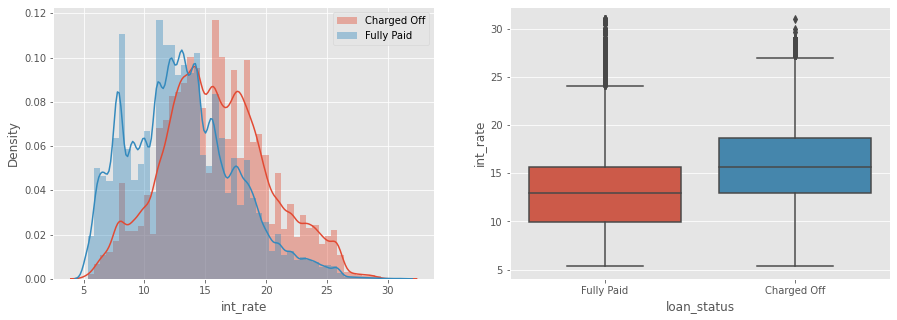

In [23]:
with plt.style.context('ggplot'):
    plot_num_cols('int_rate')

Kesimpulan dari grafik di atas adalah interest rate yang lebih tinggi cenderung menghasilkan loan yang default.

###### Grafik untuk kolom revolving line utilization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


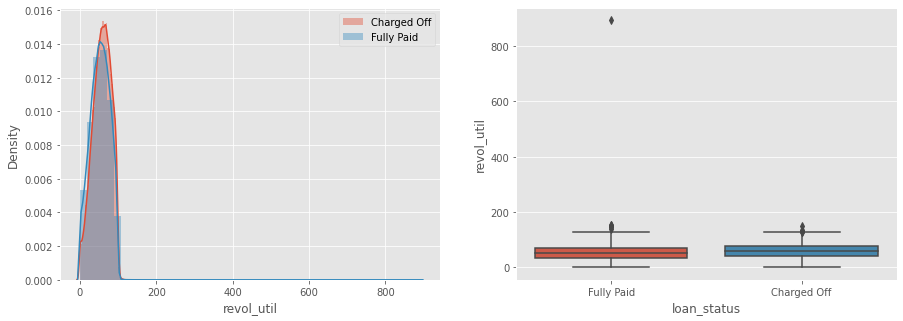

In [24]:
with plt.style.context('ggplot'):
    plot_num_cols('revol_util')

Terlihat bahwa terdapat outlier, seperti ditunjukkan pada cell di bawah.

In [26]:
df[df.revol_util > 200]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
137211,3500.0,36 months,12.49,117.08,B,B4,Budget Analyst,10+ years,RENT,45000.0,Verified,Apr-2014,Fully Paid,debt_consolidation,Debt consolidation,14.67,Oct-1998,2.0,0.0,2677.0,892.3,9.0,f,INDIVIDUAL,0.0,0.0,"12506 Connie Burg\r\nVelasquezfort, TN 00813"


Drop outlier

In [27]:
df.drop(df[df.revol_util > 200].index, inplace=True)

###### Grafik untuk kolom revolving line utilization (tanpa outlier)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


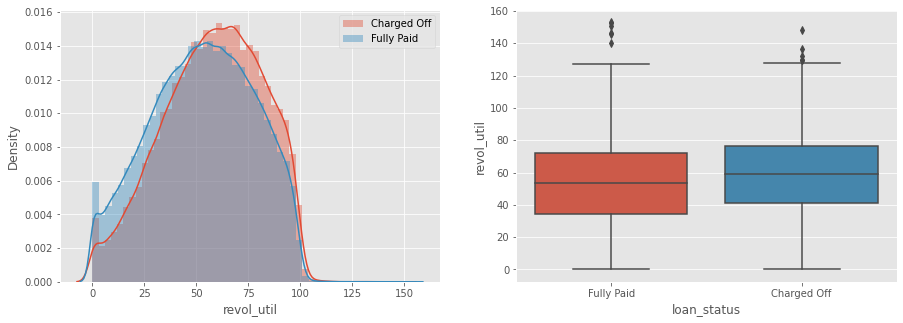

In [28]:
with plt.style.context('ggplot'):
    plot_num_cols('revol_util')

Kesimpulan dari grafik di atas adalah rasio penggunaan credit line yang lebih tinggi (misalnya hampir semua digunakan), cenderung mengalami default.

#### 4. Correlation Ratio

Function untuk menghitung correlation ratio

In [29]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

Membuat kolom baru berupa encoding dari kolom loan status

In [30]:
df['charged_off'] = pd.get_dummies(df['loan_status'])['Fully Paid']

Reset index, karena terdapat kolom yang sudah di-drop.

In [35]:
df = df.reset_index(drop=True)

Grafik untuk correlation ratio

Text(0, 0.5, 'Parameter(s)')

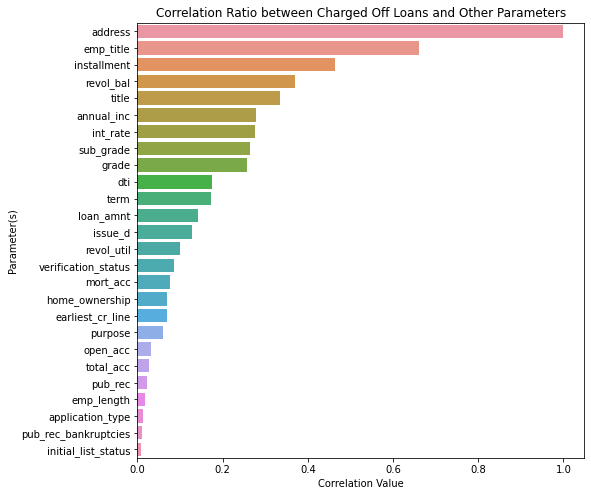

In [36]:
lis = []
for i in df.drop(['loan_status', 'charged_off'], axis=1).columns:
    lis.append([i,correlation_ratio(df[i], df['charged_off'])])
lis = pd.DataFrame(lis).sort_values(1, ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y=lis[0], x=lis[1])
plt.title('Correlation Ratio between Charged Off Loans and Other Parameters')
plt.xlabel('Correlation Value')
plt.ylabel('Parameter(s)')

Grafik heatmap untuk mengetahui korelasi antara variabel numerik

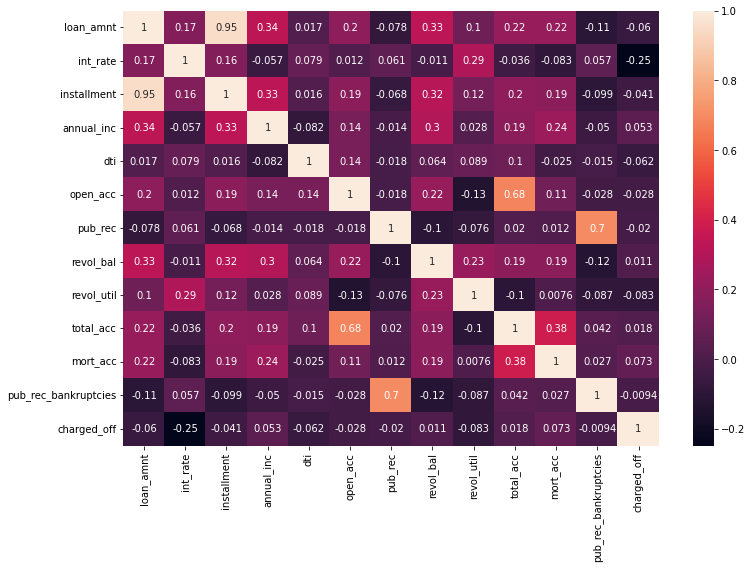

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)

### Feature Engineering

#### Missing values

Print kolom mana saja yang memiliki missing value

In [38]:
df.columns[df.isnull().any()]

Index(['emp_title', 'emp_length', 'title', 'revol_util', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

Deskripsi untuk kolom yang memiliki missing value

In [39]:
data_describe=pd.DataFrame()

data_describe['Data Features'] = df.columns[df.isnull().any()]

dataType,null,unique,uniqueSample=[],[],[],[]
for i in df.columns[df.isnull().any()]:
    dataType.append(df[i].dtype)
    null.append(df[i].isna().sum())
    
data_describe['Data Type']=dataType
data_describe['Missing Values']=null
data_describe['Missing Values Percentage']=round(data_describe['Missing Values']/len(df)*100,2)

data_describe

,Data Features,Data Type,Missing Values,Missing Values Percentage
0,emp_title,object,22927,5.79
1,emp_length,object,18301,4.62
2,title,object,1755,0.44
3,revol_util,float64,276,0.07
4,mort_acc,float64,37795,9.54
5,pub_rec_bankruptcies,float64,535,0.14


Print unique value untuk employment title

In [40]:
df['emp_title'].nunique()

173105

Menghapus kolom employment title karena terlalu banyak missing value

In [41]:
df = df.drop('emp_title', axis=1)

Menghapus kolom employment title karena tidak relevan, berdasarkan analisis pada [cell ini](https://colab.research.google.com/drive/19TG_hKt7eCiLkp3fw3N8P0R-oRSnkgya#scrollTo=CA7zXe7XtYGP&line=2&uniqifier=1)



In [42]:
df = df.drop('emp_length', axis=1)

Membandingkan kolom purpose dan title

In [43]:
df[['purpose','title']]

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance
...,...,...
396024,debt_consolidation,Debt consolidation
396025,debt_consolidation,Debt consolidation
396026,debt_consolidation,pay off credit cards
396027,debt_consolidation,Loanforpayoff


Menghapus kolom title karena identik dengan purpose

In [44]:
df = df.drop('title', axis=1)

Imputasi missing value untuk kolom mort_acc. Berdasarkan heatmap, kolom ini berkorelasi tinggi dengan total_acc, sehingga dilakukan imputasi dengan mean pada total_acc.


Menghitung mean total acc

In [45]:
mean_total_acc = df.groupby(by='total_acc').mean().mort_acc

Function untuk mengisi missing value berdasarkan mean

In [46]:
def fill_cols(by_col, na_col, mean):
    if np.isnan(na_col):
        return mean[by_col]
    else:
        return na_col

Mengaplikasikan function menggunakan lambda

In [47]:
df['mort_acc'] = df.apply(lambda x: fill_cols(x['total_acc'], x['mort_acc'], mean_total_acc), axis=1)

Menghapus sisa missing value pada kolom lain

In [48]:
df = df.dropna()
df = df.reset_index(drop=True)

#### Kolom kategorik

Print kolom kategorik

In [49]:
print('Categorical columns:')
for i in df.select_dtypes(['object']).columns:
  print(i)

Categorical columns:
term
grade
sub_grade
home_ownership
verification_status
issue_d
loan_status
purpose
earliest_cr_line
initial_list_status
application_type
address


Mengubah kolom term menjadi integer

In [50]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

Menghapus kolom grade karena kolom subgrade sudah memuat informasi yang berkaitan

In [51]:
df = df.drop('grade',axis=1)

One hot encoding untuk subgrade

In [52]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

Merge kolom one hot encoding dengan kolom semula

In [53]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

One hot encoding untuk kolom lainnya

In [54]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

Print kategori dalam kolom home ownership

In [55]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159394
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

Memasukkan kategori ANY dan NONE ke dalam OTHER

In [56]:

df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

Memproses kolom baru zip code berdasarkan 5 digit terakhir pada alamat

In [57]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

One hot encoding untuk zip code

In [58]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

Menghapus kolom issue date

In [59]:
df=df.drop('issue_d',axis=1)

Mengekstraksi informasi earliest credit year dari tanggal

In [60]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

Reset index

In [61]:
df = df.reset_index(drop=True)

Menghapus kolom loan status karena sudah digantikan oleh kolom charged off

In [62]:
df = df.drop('loan_status', axis=1)

### Modeling

Mendefinisikan variabel target (y) dan feature (x)

In [63]:
from sklearn.model_selection import train_test_split
X = df.drop('charged_off',axis=1)
y = df['charged_off']

Melakukan splitting untuk data training , validation, dan test

In [64]:
train_ratio = 0.50
validation_ratio = 0.25
test_ratio = 0.25

# Generate TrainX and TrainY
trainX, testX, trainY, testY = train_test_split(X, y, test_size= 1 - train_ratio)
# Genearate ValX, TestX, ValY and TestY
valX, testX, valY, testY = train_test_split(testX, testY, test_size=test_ratio/(test_ratio + validation_ratio))

Melakukan standarisasi

In [65]:
sc=StandardScaler()

scaler = sc.fit(X)

trainX_scaled = scaler.transform(trainX)
valX_scaled = scaler.transform(valX)
testX_scaled = scaler.transform(testX)

Function untuk evaluasi model

In [73]:
def evaluate(model, true, pred):
        clf_report = pd.DataFrame(classification_report(true, pred.round(), output_dict=True))
        print("Test Result:\n")        
        print(f"Accuracy: {accuracy_score(true, pred.round()) * 100:.2f}%")
        print("")
        print(f"AUC score: {roc_auc_score(testY, model.predict(testX_scaled)):.2f}")
        print(f"Classification report:\n{clf_report}")
        print("")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred.round())}\n")

#### Logistic Regression

Fitting model logistic regression dengan data training

In [69]:
model_logit = LogisticRegression(max_iter=1000).fit(trainX_scaled, trainY)

Evaluasi model logistic regression

In [74]:
evaluate(model_logit, testY, model_logit.predict(testX_scaled))

Test Result:

Accuracy: 88.88%

AUC score: 0.73
Classification report:
                      0             1  accuracy     macro avg  weighted avg
precision      0.954282      0.881927  0.888751      0.918105      0.896176
recall         0.456984      0.994631  0.888751      0.725808      0.888751
f1-score       0.618015      0.934895  0.888751      0.776455      0.872490
support    19458.000000  79347.000000  0.888751  98805.000000  98805.000000

Confusion Matrix: 
 [[ 8892 10566]
 [  426 78921]]



Menyimpan metrics evaluasi model logistic regression

In [96]:
acc_logit = accuracy_score(testY, model_logit.predict(testX_scaled))
auc_logit = roc_auc_score(testY, model_logit.predict_proba(testX_scaled)[:, 1])

#### Deep learning tensorflow 

Menentukan input shape, batch , epochs, dan lain-lain

In [76]:
input_shape = trainX.shape[1]

n_batch_size = 128

n_steps_per_epoch = int(trainX.shape[0] / n_batch_size)
n_validation_steps = int(valX.shape[0] / n_batch_size)
n_test_steps = int(testX.shape[0] / n_batch_size)

n_epochs = 120


print('Input Shape: ' + str(input_shape))
print('Batch Size: ' + str(n_batch_size))
print()
print('Steps per Epoch: ' + str(n_steps_per_epoch))
print()
print('Validation Steps: ' + str(n_validation_steps))
print('Test Steps: ' + str(n_test_steps))
print()
print('Number of Epochs: ' + str(n_epochs))

Input Shape: 78
Batch Size: 128

Steps per Epoch: 1543

Validation Steps: 771
Test Steps: 771

Number of Epochs: 120


Menentukan arsitektur model

In [102]:
model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001),input_shape=(input_shape,)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

Compiling model

In [107]:
model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['AUC'])

Fitting model

In [108]:
history = model.fit(trainX_scaled,
                    trainY,
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(valX_scaled, valY),
                    validation_steps=n_validation_steps,)

Epoch 1/120
1543/1543 [==============================] - 5s 3ms/step - loss: 0.3638 - auc: 0.8906 - val_loss: 0.2948 - val_auc: 0.9032
Epoch 2/120
1543/1543 [==============================] - 4s 3ms/step - loss: 0.2813 - auc: 0.9021 - val_loss: 0.2757 - val_auc: 0.9034
Epoch 3/120
1543/1543 [==============================] - 4s 2ms/step - loss: 0.2716 - auc: 0.9028 - val_loss: 0.2698 - val_auc: 0.9045
Epoch 4/120
1543/1543 [==============================] - 4s 3ms/step - loss: 0.2688 - auc: 0.9033 - val_loss: 0.2669 - val_auc: 0.9058
Epoch 5/120
1543/1543 [==============================] - 4s 2ms/step - loss: 0.2672 - auc: 0.9036 - val_loss: 0.2666 - val_auc: 0.9058
Epoch 6/120
1543/1543 [==============================] - 4s 2ms/step - loss: 0.2664 - auc: 0.9039 - val_loss: 0.2654 - val_auc: 0.9061
Epoch 7/120
1543/1543 [==============================] - 4s 3ms/step - loss: 0.2656 - auc: 0.9040 - val_loss: 0.2660 - val_auc: 0.9059
Epoch 8/120
1543/1543 [==============================] 

Melakukan plotting AUC dan loss

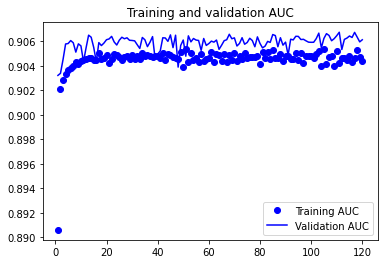

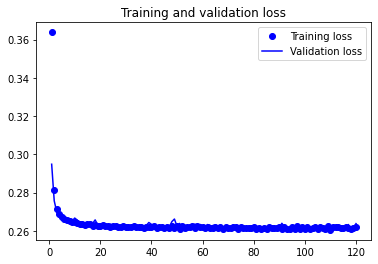

In [111]:
AUC = history.history['auc']
val_AUC = history.history['val_auc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(AUC) + 1)

plt.plot(epochs, AUC, 'bo', label='Training AUC')
plt.plot(epochs, val_AUC, 'b', label='Validation AUC')
plt.title('Training and validation AUC')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Evaluasi model deep learning

In [112]:
evaluate(model, testY, model.predict(testX_scaled))

Test Result:

Accuracy: 88.81%

AUC score: 0.91
Classification report:
                      0             1  accuracy     macro avg  weighted avg
precision      0.916435      0.884881  0.888103      0.900658      0.891095
recall         0.475126      0.989376  0.888103      0.732251      0.888103
f1-score       0.625804      0.934216  0.888103      0.780010      0.873479
support    19458.000000  79347.000000  0.888103  98805.000000  98805.000000

Confusion Matrix: 
 [[ 9245 10213]
 [  843 78504]]



Menyimpan metrics evaluasi model ANN

In [113]:
acc_ann = accuracy_score(testY, model.predict(testX_scaled).round())
auc_ann = roc_auc_score(testY, model.predict(testX_scaled))

##### Perbandingan Logistic Regression dan Tensorflow

In [114]:
metrics = {'Logistic regression' : [acc_logit, auc_logit],
           'Tensorflow': [acc_ann, auc_ann]}
pd.DataFrame(metrics, index=['Accuracy','AUC Score'])

,Logistic regression,Tensorflow
Accuracy,0.888751,0.888103
AUC Score,0.907278,0.906522


#### Kesimpulan

Dari dua algoritma machine learning yang digunakan, ternyata menghasilkan metrics yang tidak jauh berbeda. Oleh karena itu dengan alasan efisiensi, model logistic regression dipilih karena memiliki waktu executing yang lebih cepat.